# Model 6 - Unconformity

An unconformity cutting an anticline structure. We start by importing the necessary dependencies:

In [1]:
# These two lines are necessary only if GemPy is not installed
import sys, os
sys.path.append("../..")

# Importing GemPy
import gempy as gp

# Embedding matplotlib figures in the notebooks
%matplotlib inline

# Importing auxiliary libraries
import numpy as np
import matplotlib.pyplot as plt

../..\gempy\posterior_analysis.py:28: UserWarning: pymc (v3) package is not installed. No support for stochastic simulation posterior analysis.
  warnings.warn("pymc (v3) package is not installed. No support for stochastic simulation posterior analysis.")


Creating the model by importing the input data and displaying it:

In [2]:
geo_data = gp.create_data([0,1000,0,1000,0,1000],resolution=[50,50,50], 
                        path_o = os.pardir+"/examples/input_data/model6_orientations.csv",
                        path_i = os.pardir+"/examples/input_data/model6_surface_points.csv") 

../..\gempy\data_management.py:1267: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  values = np.vstack(map(np.ravel, g)).T.astype("float32")


In [3]:
geo_data.get_data()

X      Y      Z formation          series  \
interfaces   0      0.0  200.0  400.0     rock1  Default series   
             8    200.0  800.0  600.0     rock1  Default series   
             1      0.0  500.0  400.0     rock1  Default series   
             2      0.0  800.0  400.0     rock1  Default series   
             3    100.0  200.0  500.0     rock1  Default series   
             4    100.0  500.0  500.0     rock1  Default series   
             5    100.0  800.0  500.0     rock1  Default series   
             6    200.0  200.0  600.0     rock1  Default series   
             7    200.0  500.0  600.0     rock1  Default series   
             9    800.0  200.0  600.0     rock1  Default series   
             17  1000.0  800.0  400.0     rock1  Default series   
             10   800.0  500.0  600.0     rock1  Default series   
             11   800.0  800.0  600.0     rock1  Default series   
             12   900.0  200.0  500.0     rock1  Default series   
             13   900.0  500.0  500.0     rock1  Default series   
             14   900.0  800.0  500.0     rock1  Default series   
             15  1000.0  200.0  400.0     rock1  Default series   
             16  1000.0  500.0  400.0     rock1  Default series   
             25   100.0  500.0  700.0     rock2  Default series   
             26   100.0  800.0  700.0     rock2  Default series   
             27   900.0  200.0  700.0     rock2  Default series   
             29   900.0  800.0  700.0     rock2  Default series   
             20     0.0  800.0  600.0     rock2  Default series   
             28   900.0  500.0  700.0     rock2  Default series   
             19     0.0  500.0  600.0     rock2  Default series   
             24   100.0  200.0  700.0     rock2  Default series   
             18     0.0  200.0  600.0     rock2  Default series   
             23  1000.0  800.0  600.0     rock2  Default series   
             22  1000.0  500.0  600.0     rock2  Default series   
             21  1000.0  200.0  600.0     rock2  Default series   
             30   200.0  200.0  701.0     rock3  Default series   
             31   200.0  500.0  701.0     rock3  Default series   
             32   200.0  800.0  701.0     rock3  Default series   
             33   500.0  200.0  701.0     rock3  Default series   
             34   500.0  500.0  701.0     rock3  Default series   
             35   500.0  800.0  701.0     rock3  Default series   
             36   800.0  200.0  701.0     rock3  Default series   
             37   800.0  500.0  701.0     rock3  Default series   
             38   800.0  800.0  701.0     rock3  Default series   
             39     0.0    0.0    0.0  basement  Default series   
orientations 2    100.0  500.0  500.0     rock1  Default series   
             3    900.0  500.0  500.0     rock1  Default series   
             0    100.0  500.0  700.0     rock2  Default series   
             1    900.0  500.0  700.0     rock2  Default series   
             4    500.0  500.0  701.0     rock3  Default series   

                 formation_number  order_series  isFault           G_x  \
interfaces   0                  1             1    False           NaN   
             8                  1             1    False           NaN   
             1                  1             1    False           NaN   
             2                  1             1    False           NaN   
             3                  1             1    False           NaN   
             4                  1             1    False           NaN   
             5                  1             1    False           NaN   
             6                  1             1    False           NaN   
             7                  1             1    False           NaN   
             9                  1             1    False           NaN   
             17                 1             1    False           NaN   
             10                 1             1    

Setting and ordering the units and series:

In [4]:
gp.set_series(geo_data, {"Strat_Series1": ('rock3'), "Strat_Series2": ('rock2','rock1'),"Basement_Series":('basement')},
                        order_series = ['Strat_Series1','Strat_Series2','Basement_Series'],
                        order_formations=np.array(['rock3','rock2','rock1','basement']), verbose=0)

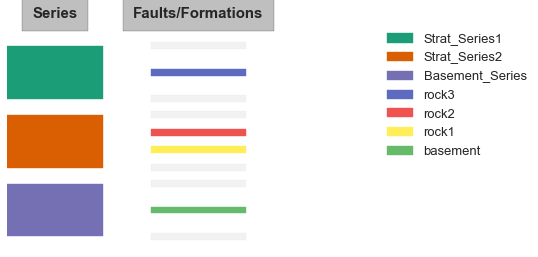

In [5]:
%matplotlib inline
gp.get_sequential_pile(geo_data)

In [6]:
%matplotlib inline
#gp.plotting.plot_data(geo_data, direction='y')

Calculating the model:

In [7]:
interp_data = gp.InterpolatorData(geo_data, u_grade=[1], output='geology', compile_theano=True, theano_optimizer='fast_compile')

Compiling theano function...
Compilation Done!
Level of Optimization:  fast_compile
Device:  cpu
Precision:  float32
Number of faults:  0


In [8]:
lith_block, fault_block = gp.compute_model(interp_data)

C:\Users\Jan\Anaconda3\lib\site-packages\theano\tensor\subtensor.py:2339: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out[0][inputs[2:]] = inputs[1]


Displaying the result in x and y direction:

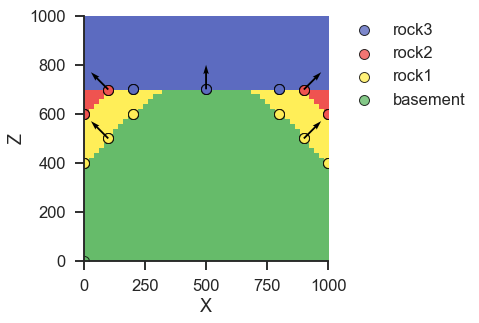

In [10]:
%matplotlib inline
gp.plotting.plot_section(geo_data, lith_block[0], cell_number=25,
                         direction='y', plot_data=True)

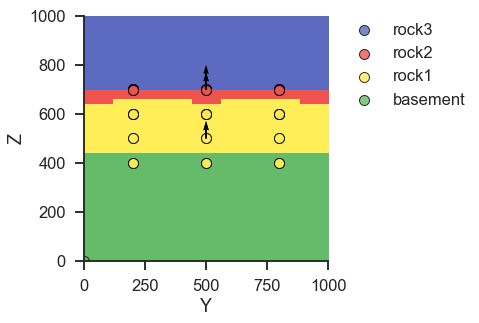

In [14]:
%matplotlib inline
gp.plotting.plot_section(geo_data, lith_block[0], cell_number=47,
                         direction='x', plot_data=True)